In [1]:
# pip install --user yfinance

In [2]:
# pip install --user yahoo_fin

In [3]:
# pip install pandas-datareader

In [4]:
start='2018-10-27'
end  ='2020-9-30'
# data_source = 'yahoo'

In [5]:
# from pandas_datareader import data
import yfinance as yf
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import deepcopy as copy

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


### VOO example

In [6]:
VOO = yf.Ticker("VOO")
VOO = VOO.history(start=start, end=end)
VOO.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-10-29,238.38,239.65,230.43,234.01,5126200,0.0,0
2018-10-30,233.82,237.75,233.33,237.59,3619100,0.0,0
2018-10-31,240.01,242.29,239.58,240.08,4073400,0.0,0
2018-11-01,240.89,242.73,239.76,242.57,2870700,0.0,0


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


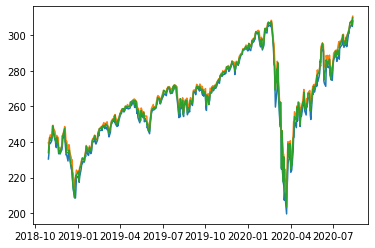

In [7]:
plt.plot(VOO['Low'])
plt.plot(VOO['High'])
plt.plot(VOO['Close'])

# EDA

2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00
2018-10-29 00:00:00 2020-08-12 00:00:00


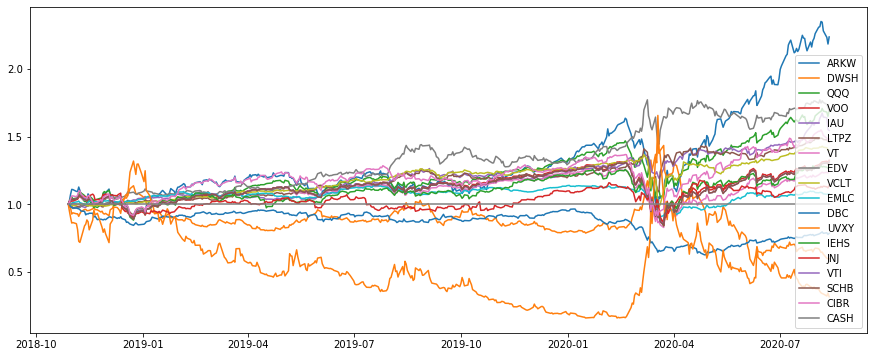

In [8]:
list_of_ETF_names =         ['ARKW','DWSH','QQQ','VOO','IAU','LTPZ', 'VT','EDV','VCLT','EMLC','DBC','UVXY','IEHS','JNJ','VTI','SCHB','CIBR','CASH']
asset_fraction_RayDalio =   [   0.0,   0.0,  0.0,  0.0, 0.05,   0.2, 0.35,  0.2, 0.075, 0.075, 0.05,   0.0,   0.0,  0.0,  0.0,   0.0,   0.0,   0.0]
asset_fraction_Preliminary= [   1.0,   1.0,  1.0,  1.0,  1.0,   1.0,  0.0,  0.0,   0.0,   0.0,  0.0,   0.0,   0.0,  0.0,  0.0,   0.0,   0.0,   0.0]
asset_fraction_Preliminary = np.array(asset_fraction_Preliminary)/np.sum(asset_fraction_Preliminary)

list_of_ETFs = []

for ETF_names in list_of_ETF_names:
  if ETF_names == 'CASH':
    tmp = yf.Ticker('VOO')
    tmp = tmp.history(start=start, end=end)
    tmp['Open'] = 1.0
    tmp['High'] = 1.0
    tmp['Low'] = 1.0
    tmp['Close'] = 1.0
    tmp['Volume'] = 1.0
    tmp['Dividends'] = 0.0
    tmp['Stock Splits'] = 0.0
    list_of_ETFs.append(tmp.copy())
  else:
    tmp = yf.Ticker(ETF_names)
    list_of_ETFs.append(tmp.history(start=start, end=end).copy())

plt.figure(figsize=(15,6))
for item in list_of_ETFs:
  print(item.index[0], item.index[-1])
#   print(item['Date'][0])
  plt.plot(item['Close']/item['Close'][0])
plt.legend(list_of_ETF_names)

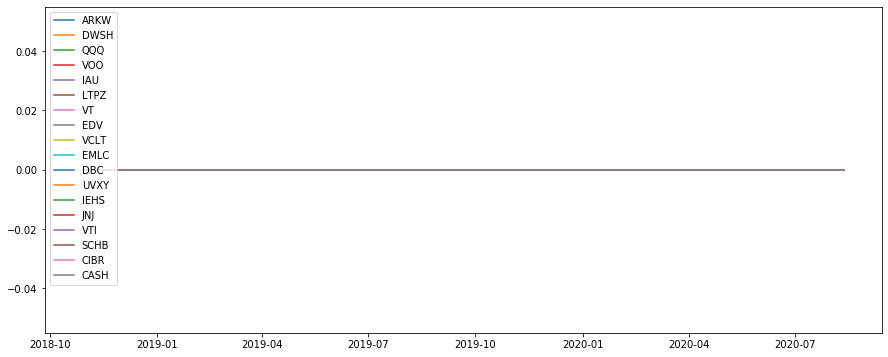

In [9]:
plt.figure(figsize=(15,6))
for item in list_of_ETFs:
  plt.plot(item['Stock Splits'])
plt.legend(list_of_ETF_names)

In [10]:
def get_index(ETFname):
  for i,name in enumerate(list_of_ETF_names):
    if name==ETFname:
      return i

### TEST: Prilimirary portfolio vs Raydalio All weather

In [11]:
def get_portfolio(asset_fraction):

  portfolio = pd.DataFrame(list_of_ETFs[0]['Close'].copy())
  portfolio['Close'] = 10000.0
  
  asset_value = portfolio.iloc[0]['Close']
  for iDate in range(1,len(portfolio['Close'])):
    asset_value = portfolio.iloc[iDate-1]['Close']
    asset_value_change = 0
    for iETF,ETF in enumerate(list_of_ETFs):
      changes_ratio = ETF.iloc[iDate]['Close']/ETF.iloc[iDate-1]['Close'] - 1.0
      asset_value_change = asset_value_change + asset_value*asset_fraction[iETF]*changes_ratio
      asset_value_change = asset_value_change + asset_value*asset_fraction[iETF]/ETF.iloc[iDate]['Close']*ETF.iloc[iDate]['Dividends']
    asset_value = asset_value + asset_value_change
    portfolio.iloc[iDate]['Close'] = asset_value

  return portfolio

In [12]:
portfolio_RayDalio = get_portfolio(asset_fraction_RayDalio)
portfolio_Preliminary = get_portfolio(asset_fraction_Preliminary)

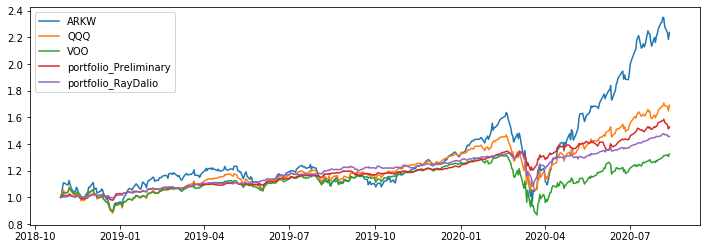

In [13]:
plt.figure(figsize=(12,4))
item = list_of_ETFs[get_index('ARKW')]
plt.plot(item['Close']/item['Close'][0])
item = list_of_ETFs[get_index('QQQ')]
plt.plot(item['Close']/item['Close'][0])
item = list_of_ETFs[get_index('VOO')]
plt.plot(item['Close']/item['Close'][0])

plt.plot(portfolio_Preliminary['Close']/portfolio_Preliminary['Close'][0])
plt.plot(portfolio_RayDalio['Close']/portfolio_RayDalio['Close'][0])

plt.legend([list_of_ETF_names[get_index('ARKW')],
            list_of_ETF_names[get_index('QQQ')],
            list_of_ETF_names[get_index('VOO')],
            'portfolio_Preliminary',
            'portfolio_RayDalio'])

In [14]:
def get_linear_model(asset_hist):
  n_days = len(asset_hist)
  momentum = (asset_hist[-1]/asset_hist[0]-1.0)/n_days
  diff = asset_hist/asset_hist[0] - momentum*range(n_days)
  return momentum, diff


# performace_measure_duration = 60 ~ approximate 3 month
# tolarable volatility / momentum = 0.7

def get_portfolio_performance_based_on_linear_model(asset_fraction):
  asset_fraction_tmp = np.array(asset_fraction)
  asset_fraction_tmp = asset_fraction_tmp/np.sum(asset_fraction_tmp)
  portfolio = get_portfolio(asset_fraction_tmp)
  Momentum = []
  volatility = []
  for i in range(len(portfolio['Close'] -21)):
    tmp = portfolio['Close'][i:i+21]
    p, diff = get_linear_model(tmp)
    std = np.std(diff)
    Momentum.append(p)
    volatility.append(std)

  return np.array(Momentum) - 0.7*np.array(volatility)

In [15]:
# Exponential Moving Average (EMA)
s = 2.0 # smoothing param
d = 60  # averaging duration

def get_EMA(asset_hist):
  EMA = [np.mean(asset_hist[0:d])]
  for i in range(d,len(asset_hist)):
    EMA.append(asset_hist[i]*s/(1.0+d) + EMA[-1]*(1.0-s/(1.0+d)))
  
  return pd.Series(EMA,index=asset_hist.index[d-1:])

In [16]:
EMAs = {'ARKW':get_EMA(list_of_ETFs[get_index('ARKW')]['Close']),
        'QQQ' :get_EMA(list_of_ETFs[get_index('QQQ' )]['Close']),
        'VOO' :get_EMA(list_of_ETFs[get_index('VOO' )]['Close']),
        'Preliminary':get_EMA(portfolio_Preliminary['Close']),
        'RayDalio':get_EMA(portfolio_RayDalio['Close'])}

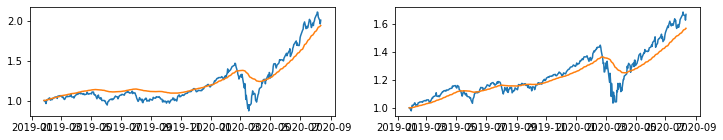

In [17]:
plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
plt.plot(list_of_ETFs[get_index('ARKW')]['Close'][d-1:]/list_of_ETFs[get_index('ARKW')]['Close'][d-1])
plt.plot(EMAs['ARKW']/EMAs['ARKW'][0])

plt.subplot(1,2,2)
plt.plot(list_of_ETFs[get_index('QQQ')]['Close'][d-1:]/list_of_ETFs[get_index('QQQ')]['Close'][d-1])
plt.plot(EMAs['QQQ']/EMAs['QQQ'][0])

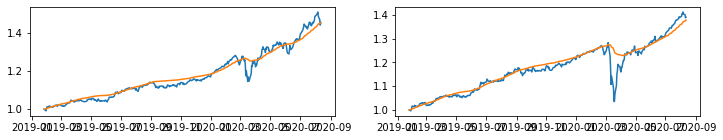

In [18]:
plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
plt.plot(portfolio_Preliminary['Close'][d-1:]/portfolio_Preliminary['Close'][d-1])
plt.plot(EMAs['Preliminary']/EMAs['Preliminary'][0])

plt.subplot(1,2,2)
plt.plot(portfolio_RayDalio['Close'][d-1:]/portfolio_RayDalio['Close'][d-1])
plt.plot(EMAs['RayDalio']/EMAs['RayDalio'][0])

In [19]:
# performace measure similar to Sharpe Ratio
# measure = normalized gain  / ( normalzied std + epsilon)
epsilon = 0.003  # fractional tolerable volatility
dd = 100 # performance measure duration 

def get_performance_based_on_EMA(asset_hist):
  EMA = get_EMA(asset_hist)
  DIFF = asset_hist[d-1:]/EMA - 1.0
  performance = []
  for i in range(len(EMA)-dd):
    performance.append( (asset_hist[d-1+i+dd]/asset_hist[d-1+i]-1.0) / (np.std(DIFF[i:i+dd])+epsilon) )
  return np.mean(performance)/(np.std(performance)+epsilon)

In [20]:
print('ARKW performace:',  get_performance_based_on_EMA(list_of_ETFs[get_index('ARKW')]['Close']) )
print('QQQ  performace:',  get_performance_based_on_EMA(list_of_ETFs[get_index('QQQ') ]['Close']) )
print('VOO  performace:',  get_performance_based_on_EMA(list_of_ETFs[get_index('VOO') ]['Close']) )
print('RayDalio performace:',  get_performance_based_on_EMA(portfolio_RayDalio['Close']))
print('Preliminary performace:',  get_performance_based_on_EMA(portfolio_Preliminary['Close']))

ARKW performace: 0.721360992718913
QQQ  performace: 1.0822948066544587
VOO  performace: 0.7203440974097137
RayDalio performace: 1.5087195560537139
Preliminary performace: 3.200866481252589


### Optimize portfolio: 

In [21]:
from scipy import optimize
from copy import deepcopy as copy

In [22]:
def obj(asset_fraction):
  asset_fraction_tmp = np.array(asset_fraction)
  asset_fraction_tmp = asset_fraction_tmp/np.sum(asset_fraction_tmp)
  portfolio = get_portfolio(asset_fraction_tmp)
  performance = get_performance_based_on_EMA(portfolio['Close'])
  return -performance

In [23]:
list_of_ETF_names

['ARKW',
 'DWSH',
 'QQQ',
 'VOO',
 'IAU',
 'LTPZ',
 'VT',
 'EDV',
 'VCLT',
 'EMLC',
 'DBC',
 'UVXY',
 'IEHS',
 'JNJ',
 'VTI',
 'SCHB',
 'CIBR',
 'CASH']

In [24]:
bounds = [(0.0,1.0) for i in range(len(list_of_ETF_names))]
len(bounds)

18

In [25]:
# result = optimize.differential_evolution(obj,bounds,disp=True,popsize=20,workers=30)

In [26]:
# asset_fraction = result.x/np.sum(result.x)

asset_fraction = np.array([0.        , 0.00327022, 0.51492578, 0.        , 0.        ,
       0.        , 0.        , 0.23805659, 0.        , 0.        ,
       0.        , 0.02324708, 0.        , 0.00705438, 0.        ,
       0.        , 0.        , 0.21344594])

In [27]:
asset_fraction

array([0.        , 0.00327022, 0.51492578, 0.        , 0.        ,
       0.        , 0.        , 0.23805659, 0.        , 0.        ,
       0.        , 0.02324708, 0.        , 0.00705438, 0.        ,
       0.        , 0.        , 0.21344594])

In [28]:
for i,ETFname in enumerate(list_of_ETF_names):
    print(ETFname,asset_fraction[i])

ARKW 0.0
DWSH 0.00327022
QQQ 0.51492578
VOO 0.0
IAU 0.0
LTPZ 0.0
VT 0.0
EDV 0.23805659
VCLT 0.0
EMLC 0.0
DBC 0.0
UVXY 0.02324708
IEHS 0.0
JNJ 0.00705438
VTI 0.0
SCHB 0.0
CIBR 0.0
CASH 0.21344594


In [29]:
portfolio = get_portfolio(asset_fraction)

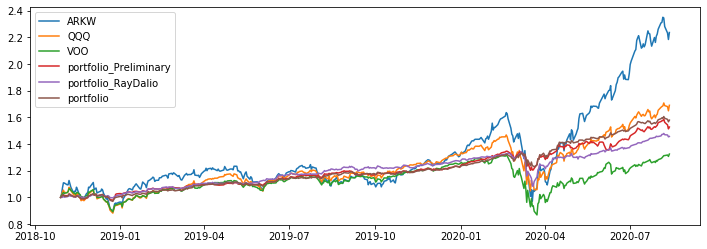

In [30]:
plt.figure(figsize=(12,4))
item = list_of_ETFs[get_index('ARKW')]
plt.plot(item['Close']/item['Close'][0])
item = list_of_ETFs[get_index('QQQ')]
plt.plot(item['Close']/item['Close'][0])
item = list_of_ETFs[get_index('VOO')]
plt.plot(item['Close']/item['Close'][0])

plt.plot(portfolio_Preliminary['Close']/portfolio_Preliminary['Close'][0])
plt.plot(portfolio_RayDalio['Close']/portfolio_RayDalio['Close'][0])
plt.plot(portfolio['Close']/portfolio['Close'][0])

plt.legend([list_of_ETF_names[get_index('ARKW')],
            list_of_ETF_names[get_index('QQQ')],
            list_of_ETF_names[get_index('VOO')],
            'portfolio_Preliminary',
            'portfolio_RayDalio',
            'portfolio'])

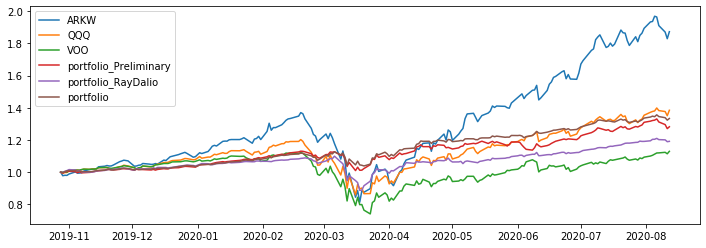

In [31]:
d_from = 250

plt.figure(figsize=(12,4))
item = list_of_ETFs[get_index('ARKW')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])
item = list_of_ETFs[get_index('QQQ')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])
item = list_of_ETFs[get_index('VOO')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])

plt.plot(portfolio_Preliminary['Close'][d_from:]/portfolio_Preliminary['Close'][d_from])
plt.plot(portfolio_RayDalio['Close'][d_from:]/portfolio_RayDalio['Close'][d_from])
plt.plot(portfolio['Close'][d_from:]/portfolio['Close'][d_from])

plt.legend([list_of_ETF_names[get_index('ARKW')],
            list_of_ETF_names[get_index('QQQ')],
            list_of_ETF_names[get_index('VOO')],
            'portfolio_Preliminary',
            'portfolio_RayDalio',
            'portfolio'])

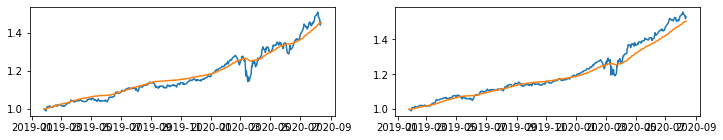

In [32]:
plt.figure(figsize=(12,2))
plt.subplot(1,2,1)
plt.plot(portfolio_Preliminary['Close'][d-1:]/portfolio_Preliminary['Close'][d-1])
plt.plot(EMAs['Preliminary']/EMAs['Preliminary'][0])

EMAs['portfolio']=get_EMA(portfolio['Close'])
plt.subplot(1,2,2)
plt.plot(portfolio['Close'][d-1:]/portfolio['Close'][d-1])
plt.plot(EMAs['portfolio']/EMAs['portfolio'][0])

# From ratio to number of shares

In [33]:
# prices = []
# for ETF in list_of_ETFs:
#     prices.append(ETF['Close'][-1])

In [34]:
prices = []
for ETFname in list_of_ETF_names:
    if ETFname == 'CASH':
        prices.append(1.0)
    else:
        prices.append(si.get_live_price(ETFname))
    print(ETFname, prices[-1])

ARKW 98.4000015258789
DWSH 17.149999618530273
QQQ 271.8599853515625
VOO 310.0400085449219
IAU 18.200000762939453
LTPZ 87.30999755859375
VT 81.87000274658203
EDV 168.5800018310547
VCLT 110.55999755859375
EMLC 31.170000076293945
DBC 13.170000076293945
UVXY 21.059999465942383
IEHS 33.7760009765625
JNJ 149.66000366210938
VTI 171.16000366210938
SCHB 80.3499984741211
CIBR 34.7599983215332
CASH 1.0


In [35]:
len(list_of_ETFs)

18

In [36]:
def get_portfolio_shares(asset_Value,asset_fraction,prices):
    shares = {}
    for i,ETFname in enumerate(list_of_ETF_names):
        shares[ETFname]=asset_Value*asset_fraction[i]/prices[i]
    return shares

### optimized portfolio shares

In [37]:
shares = get_portfolio_shares(20000,asset_fraction,prices)
shares

{'ARKW': 0.0,
 'DWSH': 3.813667723311882,
 'QQQ': 37.88168967449262,
 'VOO': 0.0,
 'IAU': 0.0,
 'LTPZ': 0.0,
 'VT': 0.0,
 'EDV': 28.242565833944226,
 'VCLT': 0.0,
 'EMLC': 0.0,
 'DBC': 0.0,
 'UVXY': 22.076999610179953,
 'IEHS': 0.0,
 'JNJ': 0.9427208108222189,
 'VTI': 0.0,
 'SCHB': 0.0,
 'CIBR': 0.0,
 'CASH': 4268.9188}

### optimized portfolio shares

In [38]:
shares = get_portfolio_shares(15000,0.4*np.array(asset_fraction)+0.6*np.array(asset_fraction_RayDalio),prices)
shares

{'ARKW': 0.0,
 'DWSH': 1.1441003169935648,
 'QQQ': 11.364506902347786,
 'VOO': 0.0,
 'IAU': 24.72527368879743,
 'LTPZ': 20.61619574312804,
 'VT': 38.47563080888633,
 'EDV': 19.15019281608109,
 'VCLT': 6.105282334528532,
 'EMLC': 21.655437868072543,
 'DBC': 34.1685647223345,
 'UVXY': 6.623099883053986,
 'IEHS': 0.0,
 'JNJ': 0.2828162432466657,
 'VTI': 0.0,
 'SCHB': 0.0,
 'CIBR': 0.0,
 'CASH': 1280.6756400000002}